<a href="https://colab.research.google.com/github/zahid-bracu/human-activity-recognition/blob/main/Human_Activity_Recognition_using_wearable_body_sensor_by_machine_learning_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset from Git

In [ ]:
!git clone "https://github.com/laxmimerit/Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN"

Cloning into 'Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 2), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [ ]:
# checking os paths

import os
path = os.listdir()[1]

In [ ]:
path

'Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN'

In [ ]:
os.listdir(path+'/WISDM_ar_v1.1')

['WISDM_ar_v1.1_raw_about.txt',
 'WISDM_ar_v1.1_raw.txt',
 'readme.txt',
 'WISDM_ar_v1.1_trans_about.txt',
 'WISDM_ar_v1.1_transformed.arff']

# Data Preprocessing

In [ ]:
# Loading dataset to a 'Processed List'

file = open(path + '/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


# Loading Data Into Pandas DataFrame

In [ ]:
# Create Pandas DataFrame from Processed List

import pandas as pd
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

# Data type to Float

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

# Time Series Visualization: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Fs = 20       # Sampling Frequency
activities = data['activity'].value_counts().index    # Activity names

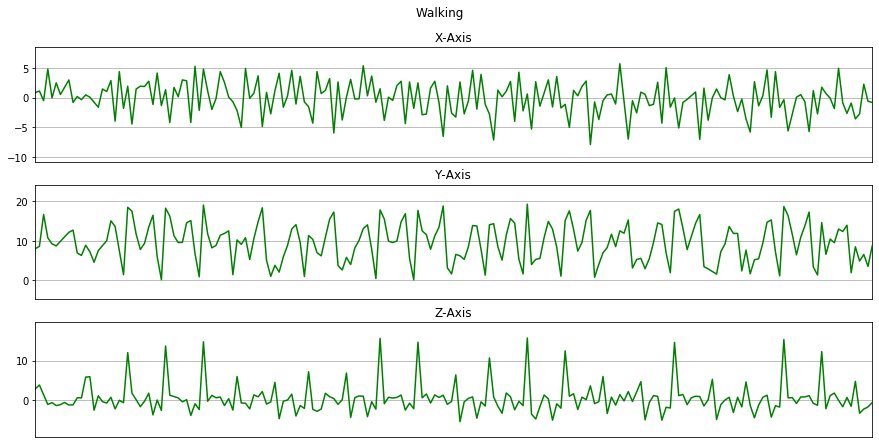

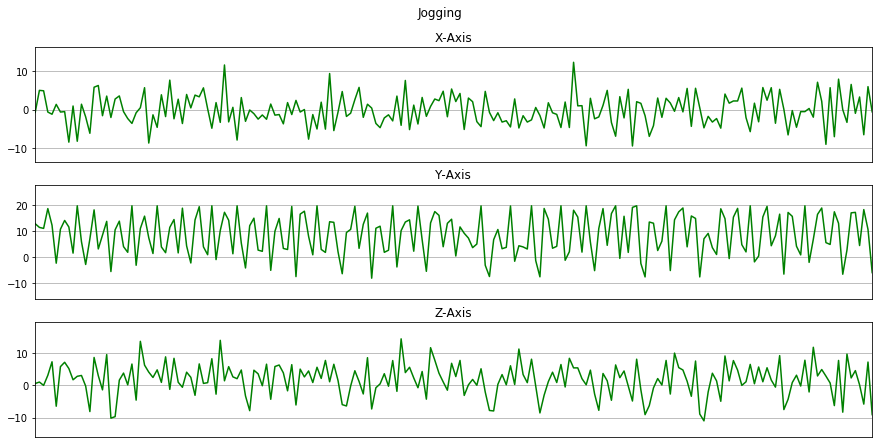

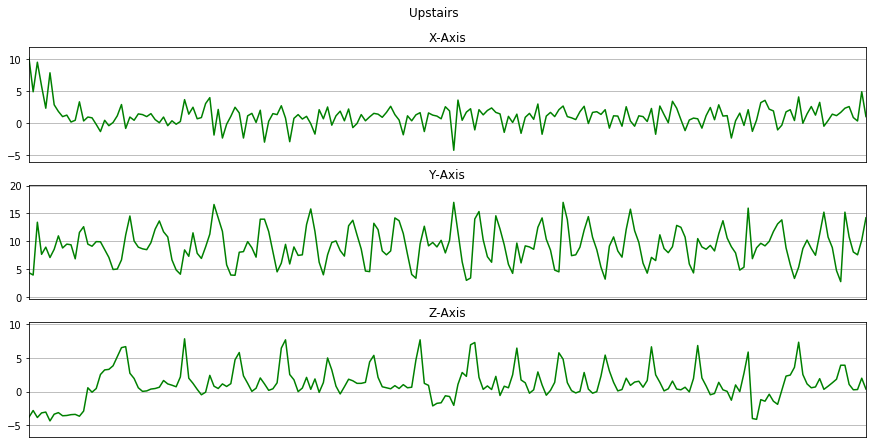

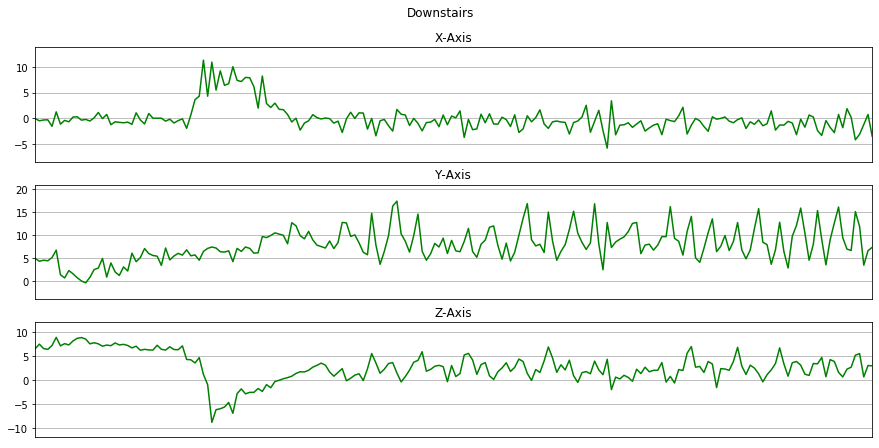

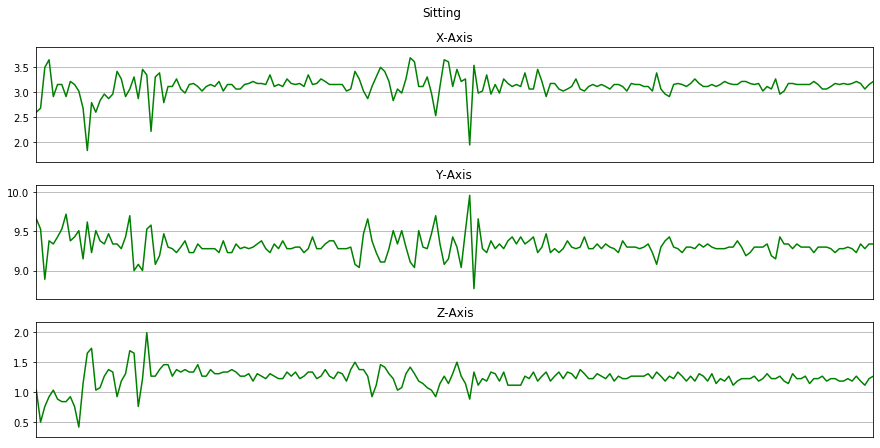

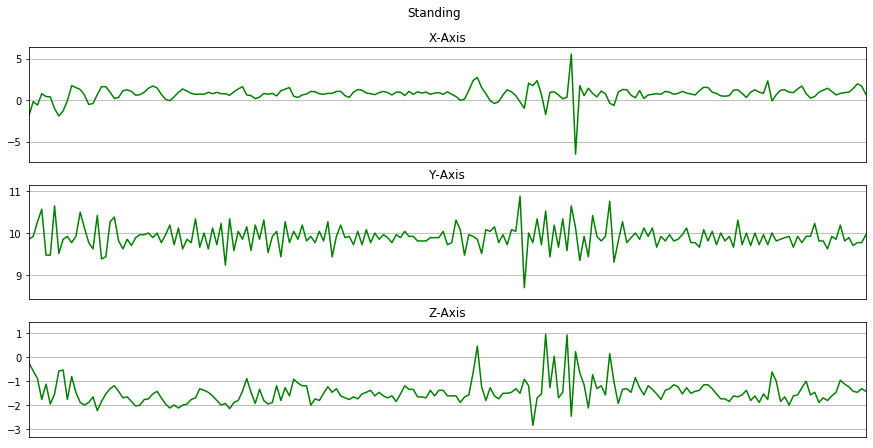

In [ ]:
# Helper functions for plotting activites

def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

## Dropping User/Time axes

In [ ]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


# Balancing Data

In [ ]:
# Taking the first 3555 samples from each class for balancing data

Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

In [ ]:
# Creating balanced dataframe

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [ ]:
balanced_data['activity'].value_counts()

Jogging       3555
Downstairs    3555
Upstairs      3555
Standing      3555
Walking       3555
Sitting       3555
Name: activity, dtype: int64

# Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['activity']

In [ ]:
# Using Scikit-learn's Standard Scalers to scale the input data

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,Walking
1,0.073590,0.020386,0.633446,Walking
2,-0.361275,1.588160,-0.103312,Walking
3,1.060258,0.437573,-0.844119,Walking
4,-0.237028,0.139962,-0.698386,Walking
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,Standing
21326,-0.542658,0.193692,0.248875,Standing
21327,-0.628514,0.197593,0.261019,Standing
21328,-0.781444,0.049322,0.155768,Standing


# Creating Frames

In [ ]:
import scipy.stats as stats
import numpy as np

In [ ]:
Fs = 20            # Sampling Frequency
frame_size = Fs*4  # Taking the frame size of 80 (4  times Sampling Frequency)
hop_size = Fs*2    # Hop size of 40 between frames (2 times Sampling Freuquency)

In [ ]:
# Helper function for getting frames

def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X, Y = get_frames(scaled_X, frame_size, hop_size)

In [ ]:
X.shape

(532, 80, 3)

In [ ]:
x = X[:,:,0]
y = X[:,:,1]
z = X[:,:,2]

In [ ]:
X.shape

(532, 80, 3)

In [ ]:
x.shape

(532, 80)

# PCA Reduction : (532,80,3) -> (532,3,3)

In [ ]:
from sklearn.decomposition import PCA

# Taking pca with 3 components along x,y,z axis seperately

pca = PCA(n_components = 3, random_state = 42)
pca_x = pca.fit_transform(x)
pca_y = pca.fit_transform(y)
pca_z = pca.fit_transform(z)

In [ ]:
import numpy as np

# Stack pca results from different axes

pca_stack = np.stack((pca_x,pca_y,pca_z),axis = 2)
pca_stack.shape

(532, 3, 3)

In [ ]:
pca_stack

array([[[-2.29397849, -1.70700462, -0.75965981],
        [-1.56945586, -2.02519767, -1.08352346],
        [-0.50483179, -0.16208085, -0.1238109 ]],

       [[-0.38547113, -0.44126988, -1.96096916],
        [-1.87982986, -1.48174349, -2.86045862],
        [ 0.02428617, -0.25569758,  2.22927478]],

       [[-0.61382428, -0.93136644, -0.2583071 ],
        [-2.27581105, -4.19983346, -1.89657213],
        [ 0.42543318,  2.28847072, -0.04490329]],

       ...,

       [[ 2.02169489,  2.02594519,  1.92994433],
        [-2.56288012, -2.47899361, -2.49380132],
        [ 0.84973403, -0.83223351, -0.79314975]],

       [[ 1.95937953,  1.98532438,  1.85556628],
        [-2.5516294 , -2.51935052, -2.51277074],
        [ 0.86505628, -0.80416002, -0.75303145]],

       [[ 2.01119544,  1.98968556,  1.88016282],
        [-2.55298358, -2.48605449, -2.48853799],
        [ 0.86794735, -0.82862713, -0.7959815 ]]])

# Plotting PCA

In [ ]:
!pip install plotly_express

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42)

# Taking pca with 2 components for plotting

pca_x = pca.fit_transform(x)
pca_y = pca.fit_transform(y)
pca_z = pca.fit_transform(z)

In [ ]:
df = pd.DataFrame(Y, columns = ['activity'])
#df.head()
activity = df[['activity']]

In [ ]:
# Creating dataframes for plotting

In [ ]:
pca_x = pd.DataFrame(pca_x, columns = ["pc1", "pc2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
pca_x = pd.concat([pca_x, activity], axis = 1, sort = False)
pca_x = pca_x.sort_values(by='activity')

In [ ]:
pca_y = pd.DataFrame(pca_y, columns = ["pc1", "pc2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
pca_y = pd.concat([pca_y, activity], axis = 1, sort = False)
pca_y = pca_y.sort_values(by='activity')

In [ ]:
pca_z = pd.DataFrame(pca_z, columns = ["pc1", "pc2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
pca_z = pd.concat([pca_z, activity], axis = 1, sort = False)
pca_z = pca_z.sort_values(by='activity')

## PCA plot on x axis data

In [ ]:
import plotly_express as px

# plot using plotly express

figx = px.scatter(
    pca_x,
    x="pc1",
    y="pc2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figx.show()

## PCA Plot on y axis data

In [ ]:
figy = px.scatter(
    pca_y,
    x="pc1",
    y="pc2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figy.show()

## PCA Plot on z axis Data

In [ ]:
figz = px.scatter(
    pca_z,
    x="pc1",
    y="pc2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figz.show()

# t-SNE Reduction : (532,80,3) -> (532,3,3)

In [ ]:
!pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68507 sha256=69175f6d37977f2797ced52fb0e6c62ea181df093eb0932bc7a9de30acbc4245
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [ ]:
#from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

# Taking TSNE with 3 components along x,y,z axis seperately

tsne = TSNE(n_components = 5, verbose = 1, perplexity = 30, n_iter = 300)
tsne_x = tsne.fit_transform(x)
tsne_y = tsne.fit_transform(y)
tsne_z = tsne.fit_transform(z)

In [ ]:
# Stack TSNE results from different axes

tsne_stack = np.stack((tsne_x,tsne_y,tsne_z),axis = 2)
tsne_stack.shape

(532, 5, 3)

In [ ]:
tsne_stack

array([[[-0.87478067,  0.28323701,  1.24739628],
        [ 0.94042148,  4.44848561, -0.12986017],
        [ 3.00572159, -1.60554202,  1.79583665],
        [-0.47287004, -6.93099002,  1.75796794],
        [-7.03603407,  1.7613949 , -0.69332654]],

       [[ 4.5235282 ,  1.53112384, -0.0413038 ],
        [-2.95786002, -0.94158594, -3.34644864],
        [ 2.22215576,  7.16907187, -9.0307688 ],
        [-0.83192852, -3.99853044, -0.69387098],
        [-4.28900948,  0.57468268,  0.0410538 ]],

       [[ 0.49693765, -0.83946429, -3.23152019],
        [-6.54053068,  2.73422362,  4.89420383],
        [ 0.03060336, -1.7143165 ,  2.24934361],
        [ 0.53747766, -7.20870404, -0.67048932],
        [-0.05615314, -0.13275072, -5.15000371]],

       ...,

       [[ 6.80199871,  3.16683773, -4.67265782],
        [-3.80588089,  2.41328345,  4.8945028 ],
        [-1.08051337,  8.20385033, -0.61671651],
        [-0.90249255, -1.797436  , -4.230278  ],
        [-3.1954743 ,  1.12235673, -2.84722009]],


# tSNE Plots

## TSNE Plot on x axis data

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 4, n_iter = 300)
tsne_x = tsne.fit_transform(x)
tsne_y = tsne.fit_transform(y)
tsne_z = tsne.fit_transform(z)

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 532 samples in 0.003s...
[t-SNE] Computed neighbors for 532 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 532 / 532
[t-SNE] Mean sigma: 0.134186
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.233459
[t-SNE] KL divergence after 300 iterations: 1.718577
[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 532 samples in 0.001s...
[t-SNE] Computed neighbors for 532 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 532 / 532
[t-SNE] Mean sigma: 0.133190
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.037773
[t-SNE] KL divergence after 300 iterations: 1.795308
[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 532 samples in 0.001s...
[t-SNE] Computed neighbors for 532 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 532 / 532
[t-SNE] Mean sigma: 0.126635
[t-SNE] KL divergence after 250 iterations

In [ ]:
tsne_x = pd.DataFrame(tsne_x, columns = ["tsne1", "tsne2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
tsne_x = pd.concat([tsne_x, activity], axis = 1, sort = False)
tsne_x = tsne_x.sort_values(by='activity')

In [ ]:
tsne_y = pd.DataFrame(tsne_y, columns = ["tsne1", "tsne2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
tsne_y = pd.concat([tsne_y, activity], axis = 1, sort = False)
tsne_y = tsne_y.sort_values(by='activity')

In [ ]:
tsne_z = pd.DataFrame(tsne_z, columns = ["tsne1", "tsne2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
tsne_z = pd.concat([tsne_z, activity], axis = 1, sort = False)
tsne_z = tsne_z.sort_values(by='activity')

In [ ]:
import plotly_express as px

figx = px.scatter(
    tsne_x,
    x="tsne1",
    y="tsne2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figx.show()

## TSNE Plot on y axis data

In [ ]:
figy = px.scatter(
    tsne_y,
    x="tsne1",
    y="tsne2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figy.show()

## TSNE Plot on z axis data

In [ ]:
import plotly_express as px

figz = px.scatter(
    tsne_z,
    x="tsne1",
    y="tsne2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figz.show()

# LDA Reduction (532,80,3) -> (532,3,3)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
labels = label.fit_transform(Y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 3)
lda_x = lda.fit_transform(x,labels)
lda_y = lda.fit_transform(y,labels)
lda_z = lda.fit_transform(z,labels)

In [ ]:
lda_stack = np.stack((lda_x,lda_y,lda_z),axis = 2)
lda_stack.shape

(532, 3, 3)

In [ ]:
lda_stack

array([[[ 1.97911126,  1.37914844,  1.23009547],
        [-3.060653  ,  1.23327535,  1.21050449],
        [-1.57473923, -0.75790765,  1.93668313]],

       [[ 0.49274144,  0.52431717,  2.39718896],
        [-1.21853003,  0.28130806,  2.4035482 ],
        [-1.29477303,  0.78813094,  0.29431982]],

       [[ 0.99993278,  2.65156074,  0.34944942],
        [-0.33887531,  0.10102646,  1.94304237],
        [ 0.83998888, -1.16773697, -0.8218233 ]],

       ...,

       [[ 1.06144305,  1.3576219 ,  1.22764526],
        [-0.87850492,  0.63549806,  0.52701934],
        [ 1.302464  ,  1.36181878, -1.49133966]],

       [[ 1.02171913,  1.39814798,  1.23551715],
        [-0.92182622,  0.61798663,  0.56745903],
        [ 1.32974594,  1.33819501, -1.47179942]],

       [[ 1.0074211 ,  1.35542122,  1.18880815],
        [-0.9456476 ,  0.70538872,  0.55584676],
        [ 1.35613955,  1.36085401, -1.49677581]]])

# LDA Plots

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
lda_x = lda.fit_transform(x,labels)
lda_y = lda.fit_transform(y,labels)
lda_z = lda.fit_transform(z,labels)

In [ ]:
lda_x = pd.DataFrame(lda_x, columns = ["lda1", "lda2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
lda_x = pd.concat([lda_x, activity], axis = 1, sort = False)
lda_x = lda_x.sort_values(by='activity')

In [ ]:
lda_y = pd.DataFrame(lda_y, columns = ["lda1", "lda2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
lda_y = pd.concat([lda_y, activity], axis = 1, sort = False)
lda_y = lda_y.sort_values(by='activity')

In [ ]:
lda_z = pd.DataFrame(lda_z, columns = ["lda1", "lda2"])
#pca_res = pca_res.sample(n=1000, random_state=42)
lda_z = pd.concat([lda_z, activity], axis = 1, sort = False)
lda_z = lda_z.sort_values(by='activity')

## LDA Plot on x axis data

In [ ]:
import plotly_express as px

figx = px.scatter(
    lda_x,
    x="lda1",
    y="lda2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figx.show()

## LDA Plot on y axis data

In [ ]:
import plotly_express as px

figy = px.scatter(
    lda_y,
    x="lda1",
    y="lda2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figy.show()

## LDA Plot on z axis data

In [ ]:
import plotly_express as px

figz = px.scatter(
    lda_z,
    x="lda1",
    y="lda2",
    color="activity",
    hover_name="activity",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence=[
        px.colors.qualitative.Vivid[0],
        px.colors.qualitative.Vivid[1],
        px.colors.qualitative.Vivid[2],
        px.colors.qualitative.Vivid[3],
        px.colors.qualitative.Vivid[4],
        px.colors.qualitative.Vivid[5],
    ],
    #facet_col="group_label",
    size_max=0.1,
)

figz.show()